- Name: Vinayak Mali
- Roll no.: 24AI60R13

I have try provide as much documentation as possible for every function (defined my me) including parameters and what function is returning

Due to this by simply clicking on function call and hovering on it, it will display what exactly function is doing

e.g.

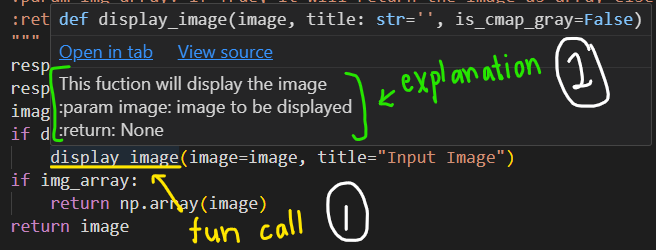

Images are uploaded on github
1. https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_2_inputs/Assignment_2_Image_1.png
2. https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_2_inputs/Assignment_2_Image_1.png

I am creating general function which i am going to use in complete code to remove redundancy of code

In [1]:
# Libraries required to get images direct from my github acc
import requests
from io import BytesIO
from PIL import Image
import numpy as np

# Function which can fetch image from my github acc and convert it into array
def fetch_image(url:str, display=False, img_array=True):
    """
    This fuction will fetch the image from url and convert it into array
    :param url: url of the image
    :param display: if True, it will plot the image using matplotlib
    :param img_array: if True, it will return the image as array else return image as it
    :return: image as array or image
    """
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content)).convert("RGB")
    if display:
        display_image(image=image, title="Input Image")
    if img_array:
        return np.array(image)
    return image

import matplotlib.pyplot as plt
def display_image(image, title:str="", is_cmap_gray=False):
    """
    This fuction will display the image
    :param image: image to be displayed
    :return: None
    """
    if is_cmap_gray:
        plt.title(title)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(image.width / 100, image.height / 100), dpi=100)
        plt.title(title)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

def get_padding_size(size):
    """
    If kernel size height/width is not even then we add padding
    Due to padding 3x3 fillter will be applied properly at corners and all sides of image
    :param size: kernel height or width
    :return: id odd then 1 else 0
    """
    return size//2

## Question 1

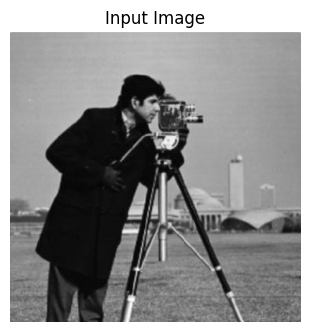

In [2]:
img_1_url = "https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_2_inputs/Assignment_2_Image_1.png"
img_1_array = fetch_image(img_1_url,True,True)

In [3]:
import numpy as np

def convolve_img_2d(image, kernel):
    """
    Convolve a 2D image with a 2D kernel.

    :param image: 2D numpy array (grayscale image)
    :param kernel: 2D numpy array (filter/kernel)
    :result: 2D numpy array (filtered image)
    """

    print("Convolution on 2D image with 2D prewitt_45 kernel")
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    print("Image And Kernel Height Width are",image_height, image_width, kernel_height, kernel_width)

    padded_image = np.pad(image, ((get_padding_size(kernel_height), get_padding_size(kernel_height)), (get_padding_size(kernel_width), get_padding_size(kernel_width))), mode='constant', constant_values=0)
    result = np.zeros_like(image)
    print("Padding completed")

    print("Applying provided kernel")
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            result[i, j] = np.sum(region * kernel)

    print("Convolution is completed")
    return result

def rgb_to_grayscale(image):
    """
    Convert an 3D image array to grayscale i.e. 2D array image
    :param image: 3D numpy array
    :return: grayscale: 2D numpy array (grayscale image)
    """
    return np.mean(image, axis=2)

Converting an 3D image array to grayscale i.e. 2D array image
Genrating Diagonal Detected Image using Prewitt with 45 degree angle
Convolution on 2D image with 2D prewitt_45 kernel
Image And Kernel Height Width are 377 377 3 3
Padding completed
Applying provided kernel
Convolution is completed
------------------------------------------------
Filtered Image is:



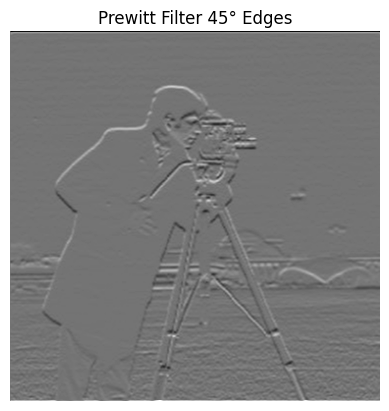

In [4]:
prewitt_45 = np.array([[ 1,  1,  0],
                       [ 0,  0,  0],
                       [-1, -1,  0]])

print("Converting an 3D image array to grayscale i.e. 2D array image")
grayscale_image = rgb_to_grayscale(img_1_array)
print("Genrating Diagonal Detected Image using Prewitt with 45 degree angle")
filtered_image = convolve_img_2d(grayscale_image, prewitt_45)

# Display the result
print("------------------------------------------------\nFiltered Image is:\n")
display_image(image=filtered_image,title='Prewitt Filter 45° Edges',is_cmap_gray=True)

---

## Question 2: Edge Detection (5 Marks)
- 5 x 5 Laplacian kernel whose central coefficient is 24 and all other coefficients are -1.
- Laplacian of the Gaussian (LoG) kernel below

    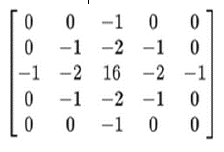

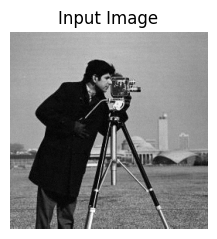

In [15]:
# Calling above function to fetch the image
img_2_url = "https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_2_inputs/Assignment_2_Image_2.png"
img_2_array = fetch_image(img_2_url,True,True)

Convolution on 2D image with 2D prewitt_45 kernel
Image And Kernel Height Width are 256 256 5 5
Padding completed
Applying provided kernel
Convolution is completed


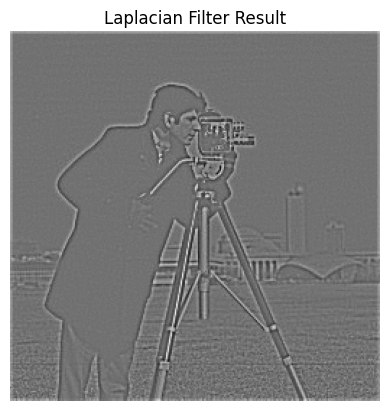

In [6]:
grayscale_image = rgb_to_grayscale(img_2_array)

laplacian_kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 24, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

laplacian_filtered = convolve_img_2d(grayscale_image, laplacian_kernel)
display_image(image=laplacian_filtered,title='Laplacian Filter Result',is_cmap_gray=True)

Convolution on 2D image with 2D prewitt_45 kernel
Image And Kernel Height Width are 256 256 5 5
Padding completed
Applying provided kernel
Convolution is completed


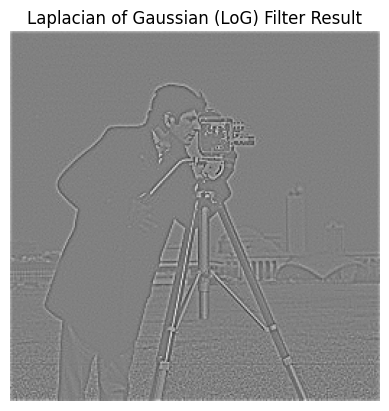

In [7]:
LoG_Kernel = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0]
])

loG_filtered = convolve_img_2d(grayscale_image, LoG_Kernel)
display_image(image=loG_filtered,title='Laplacian of Gaussian (LoG) Filter Result',is_cmap_gray=True)

Displaying Images together to understand the difference

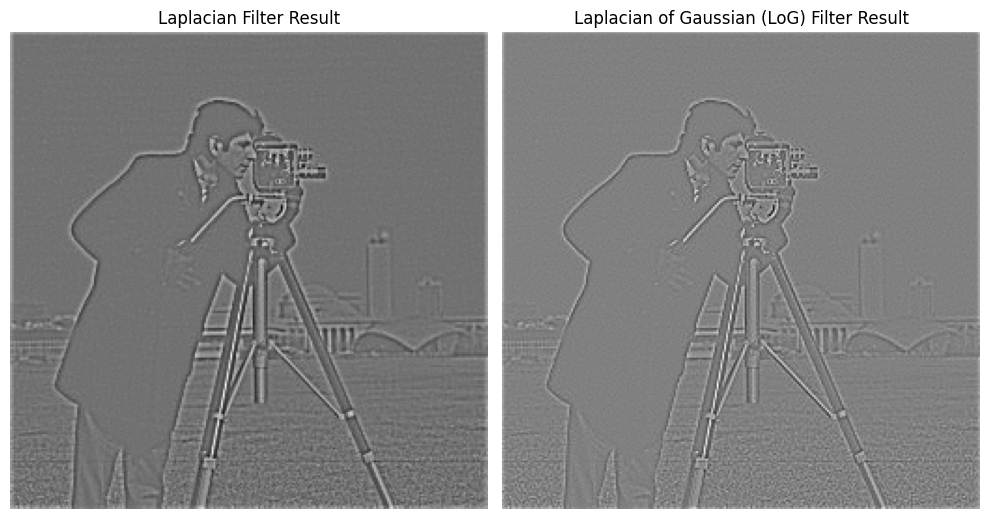

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(laplacian_filtered, cmap='gray')
ax[0].set_title('Laplacian Filter Result')
ax[0].axis('off')

ax[1].imshow(loG_filtered, cmap='gray')
ax[1].set_title('Laplacian of Gaussian (LoG) Filter Result')
ax[1].axis('off')

plt.tight_layout()
plt.show()

- Laplacian Filtred Image is more darker than LoG filtered image
- In both results edges are dected and highlighted by white


## Question 3: Sharpening Using Smoothing

Gaussian equation

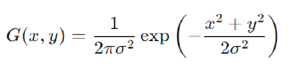

Replacing kernel array 0's with gaussian kernel values
Gaussian kernel values replaced
Normalizing kernel
'gaussian_kernel_3x3' generated
Applying Gaussian blur
Image And Kernel Height Width are 256 256 3 3 3
Initialize the output image
Applying convolution
Convolution applied
Gaussian blur applied
Creating Mask
Sharpen the Image by adding the Mask to the original image
Ensure pixel values are within valid range [0, 255]
Convert the result to an unsigned 8-bit integer type

----------------------------
Plotting Results:



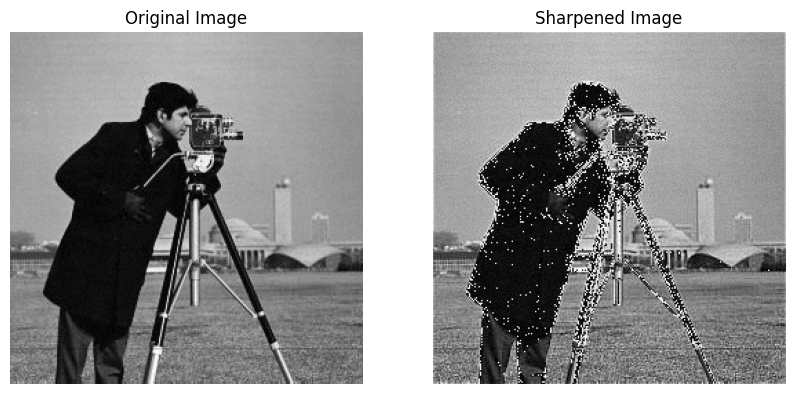

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1  # Standard deviation for Gaussian kernel
alpha = 1  # Scaling factor for the unsharp mask

def kernel_normalization(kernel):
    """
    Normalizes a given kernel.
    :param kernel: The kernel to be normalized.
    :return: The normalized kernel.
    """
    print("Normalizing kernel")
    return kernel / np.sum(kernel)

def gaussian_kernel(size=3, sigma=1):
    """
    Creating 3x3 Gaussian kernel.
    :param size: Size of the kernel.
    :param sigma: Standard deviation of the Gaussian distribution.
    :return: Gaussian kernel.
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    print("Replacing kernel array 0's with gaussian kernel values")
    for x in range(-size//2 + 1, size//2 + 1):
        for y in range(-size//2 + 1, size//2 + 1):
            kernel[x + size//2, y + size//2] = (1 / (2 * np.pi * sigma**2)) * \
                                               np.exp(-(x**2 + y**2) / (2 * sigma**2))
    print("Gaussian kernel values replaced")
    return kernel_normalization(kernel)

gaussian_kernel_3x3 = gaussian_kernel(size=3, sigma=sigma)
print("'gaussian_kernel_3x3' generated")

def apply_convolution(image, kernel):
    """Applies a convolution of the input image with a given kernel.

    """
    image_h, image_w, channels = image.shape
    kernel_h, kernel_w = kernel.shape
    print("Image And Kernel Height Width are",image_h, image_w, channels, kernel_h, kernel_w)

    pad_h = get_padding_size(kernel_h)
    pad_w = get_padding_size(kernel_w)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')

    print("Initialize the output image")
    convolved_image = np.zeros_like(image)

    print("Applying convolution")
    for i in range(image_h):
        for j in range(image_w):
            for c in range(channels):
                roi = padded_image[i:i+kernel_h, j:j+kernel_w, c]
                convolved_image[i, j, c] = np.sum(roi * kernel)
    print("Convolution applied")
    return convolved_image

print("Applying Gaussian blur")
blurred_image = apply_convolution(img_2_array, gaussian_kernel_3x3)
print("Gaussian blur applied")

print("Creating Mask")
mask = img_2_array - blurred_image

print("Sharpen the Image by adding the Mask to the original image")
sharpened_image = img_2_array + alpha * mask

print("Ensure pixel values are within valid range [0, 255]")
sharpened_image = np.clip(sharpened_image, 0, 255)

print("Convert the result to an unsigned 8-bit integer type")
sharpened_image = sharpened_image.astype(np.uint8)

print("\n----------------------------\nPlotting Results:\n")
plt.figure(figsize=(10, 6)) # Step 5: Display the original and sharpened images

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_2_array)
plt.title('Original Image')
plt.axis('off')

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


## Question 4: Gabor Filtering (7 Marks)
Implement Gabor filters at different scales, orientations, and frequencies (from scratch)
and use them to detect edges on image (Assignment_2_Image_1.png). For this
problem, you can simply use the real part of the complex Gabor filters. Use the following
specifications to construct the Gabor filter kernels:
- Kernel size: 31 ✕ 31
- Standard deviation (𝜎): 1.0 and 3.0
- Aspect ratio (𝛾): 0.5
- Orientation (𝜃): 0°, 45°, 90°, 135° (for each value of 𝜃, use 𝑢 = 𝑓0 cos 𝜃 and 𝑣 = 𝑓0
sin 𝜃, with 𝑓0 = 0.1).
- Phase offset (ɸ) = 0

For each of the two values of 𝜎, show the Gabor filter kernels (as images) as well as the
filtered outputs by taking the maximum of Gabor filtered outputs at each pixel over all
four orientations. Compare your implementation against OpenCV’s implementation of
Gabor kernels with the same parameters.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

print("Defining the parameters for the Gabor filter")
kernel_size = 31  # Size of the kernel
print("Kernel Size:",kernel_size)
sigma_values = [1.0, 3.0]  # Standard deviations
print("Sigma Values:",sigma_values)
gamma = 0.5  # Aspect ratio
print("Gamma:",gamma)
orientations = [0, 45, 90, 135]  # Orientations in degrees
print("Orientations which we are going to use:",orientations)
f0 = 0.1  # Frequency of the sinusoidal factor
phi = 0  # Phase offset
print("frequency factor and phase are",f0,phi)

Defining the parameters for the Gabor filter
Kernel Size: 31
Sigma Values: [1.0, 3.0]
Gamma: 0.5
Orientations which we are going to use: [0, 45, 90, 135]
frequency factor and phase are 0.1 0


In [11]:
def gabor_kernel(sigma, theta, lambd, gamma, phi, kernel_size):
    """
    Generate a Gabor filter kernel.
    :param sigma: Standard deviation of the Gaussian envelope.
    :param theta: Orientation of the sinusoidal factor.
    :param lambd: Wavelength of the sinusoidal factor.
    :param gamma: Aspect ratio of the sinusoidal factor.
    :param phi: Phase offset of the sinusoidal factor.
    :param kernel_size: Size of the kernel.
    :return: Gabor filter kernel.
    """
    print("Genearating Gabor Kernel")
    half_size = get_padding_size(kernel_size)
    y, x = np.meshgrid(np.arange(-half_size, half_size + 1), np.arange(-half_size, half_size + 1))

    print("Setting theta")
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    print("Generating Gaussian envelope")
    gaussian_envelope = np.exp(-0.5 * (x_theta**2 + (gamma**2) * y_theta**2) / sigma**2)

    print("Generating sinusoidal factor")
    gabor = gaussian_envelope * np.cos(2 * np.pi * x_theta / lambd + phi)

    print("Gabor kernel generated")
    # print(gabor)
    return gabor

NOTE: Print will help to understand the workflow, applogies if you need to scroll to much

In [12]:
def apply_gabor_filters(img, sigma_values, orientations, gamma, f0, phi, kernel_size):
    """
    Apply Gabor filters to an image.
    :param img: Input image.
    :param sigma_values: List of standard deviations for Gaussian envelopes.
    :param orientations: List of orientations in degrees.
    :param gamma: Aspect ratio of the sinusoidal factor.
    :param f0: Frequency of the sinusoidal factor.
    :param phi: Phase offset of the sinusoidal factor.
    :param kernel_size: Size of the kernel.
    :return: Dictionary containing filtered images
    """
    print("Applying Gabor filters to the image")
    filtered_images = {}

    for sigma in sigma_values:
        print("\n------\nApplying Gabor filters for sigma:", sigma)
        max_filtered_img = np.zeros_like(img, dtype=np.float32)

        for theta_deg in orientations:
            print("\tApplying Gabor filter for theta:", theta_deg)
            theta = np.deg2rad(theta_deg)  # Convert angle to radians
            lambd = 1 / f0  # Wavelength
            gabor_kernel_real = gabor_kernel(sigma, theta, lambd, gamma, phi, kernel_size)
            filtered_img = apply_convolution(img, gabor_kernel_real)
            max_filtered_img = np.maximum(max_filtered_img, filtered_img)

        filtered_images[sigma] = max_filtered_img

    return filtered_images

print("Applying Gabor Filter on Assignment Image 1")
filtered_images = apply_gabor_filters(img_1_array, sigma_values, orientations, gamma, f0, phi, kernel_size)


Applying Gabor Filter on Assignment Image 1
Applying Gabor filters to the image

------
Applying Gabor filters for sigma: 1.0
	Applying Gabor filter for theta: 0
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Image And Kernel Height Width are 377 377 3 31 31
Initialize the output image
Applying convolution
Convolution applied
	Applying Gabor filter for theta: 45
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Image And Kernel Height Width are 377 377 3 31 31
Initialize the output image
Applying convolution
Convolution applied
	Applying Gabor filter for theta: 90
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Image And Kernel Height Width are 377 377 3 31 31
Initialize the output image
Applying convolution
Convolution applied
	Applying Gabor filter for theta: 135
Genearati

**NOTE**: Print will help to understand the workflow, applogies if you need to scroll to much

Plotting Gabor Results
Plotting Gabor Result
Loading Fig and axes for display
Displaying Result for each theta and standard Deviation
Standard Deviation 1.0
	Theta 0
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 45
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 90
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 135
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
Normalize filtered images before displaying to avoid overflow
Standard Deviation 3.0
	Theta 0
Genearating Gabor Kernel
Setting theta
Generating

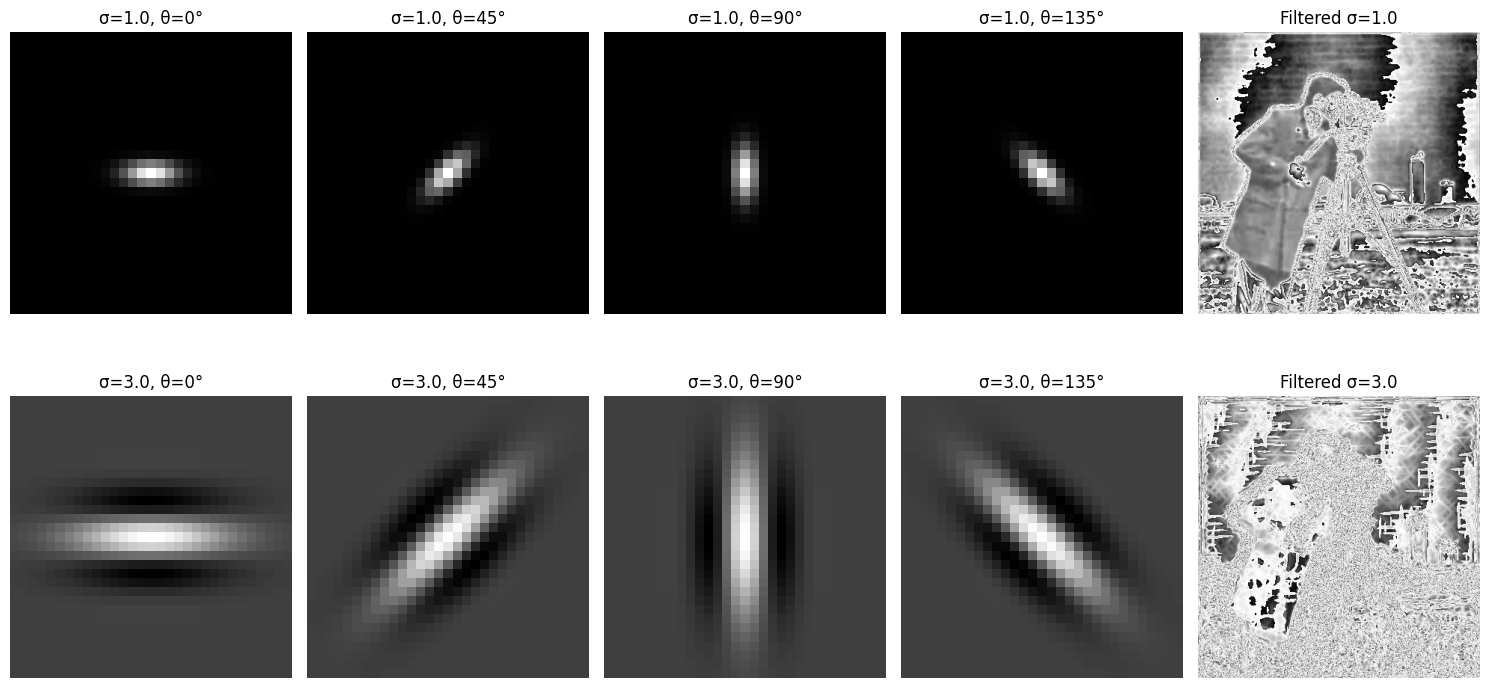

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_image(image):
    """Normalize image data to the range [0, 1]"""
    image_min = np.min(image)
    image_max = np.max(image)
    if image_max > image_min:  # Avoid division by zero
        return (image - image_min) / (image_max - image_min)
    return image

def plot_gabor_results(gabor_kernels, filtered_images, sigma_values):
    print("Plotting Gabor Result")
    print("Loading Fig and axes for display")
    fig, axes = plt.subplots(2, len(orientations) + 1, figsize=(15, 8))

    print("Displaying Result for each theta and standard Deviation")
    for i, sigma in enumerate(sigma_values):
        print("Standard Deviation", sigma)
        for j, theta_deg in enumerate(orientations):
            lambd = 1 / f0
            print("\tTheta", theta_deg)
            theta = np.deg2rad(theta_deg)
            gabor_kernel_real = gabor_kernel(sigma, theta, lambd, gamma, phi, kernel_size)
            print("Normalize the Gabor kernel before displaying")
            normalized_kernel = normalize_image(gabor_kernel_real)
            axes[i, j].imshow(normalized_kernel, cmap='gray')
            axes[i, j].set_title(f'σ={sigma}, θ={theta_deg}°')
            axes[i, j].axis('off')

        print("Normalize filtered images before displaying to avoid overflow")
        normalized_filtered_image = normalize_image(filtered_images[sigma])
        axes[i, -1].imshow(normalized_filtered_image, cmap='gray')
        axes[i, -1].set_title(f'Filtered σ={sigma}')
        axes[i, -1].axis('off')

    plt.tight_layout()
    plt.show()

print("Plotting Gabor Results")
plot_gabor_results(filtered_images, filtered_images, sigma_values)


Image results are not upto the mark.

With opencv we are getting better results

OpenCV Sigma: 1.0
	OpenCV theta: 0
	OpenCV theta: 45
	OpenCV theta: 90
	OpenCV theta: 135
OpenCV Sigma: 3.0
	OpenCV theta: 0
	OpenCV theta: 45
	OpenCV theta: 90
	OpenCV theta: 135
OpenCV Plots
Plotting Gabor Result
Loading Fig and axes for display
Displaying Result for each theta and standard Deviation
Standard Deviation 1.0
	Theta 0
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 45
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 90
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabor kernel before displaying
	Theta 135
Genearating Gabor Kernel
Setting theta
Generating Gaussian envelope
Generating sinusoidal factor
Gabor kernel generated
Normalize the Gabo

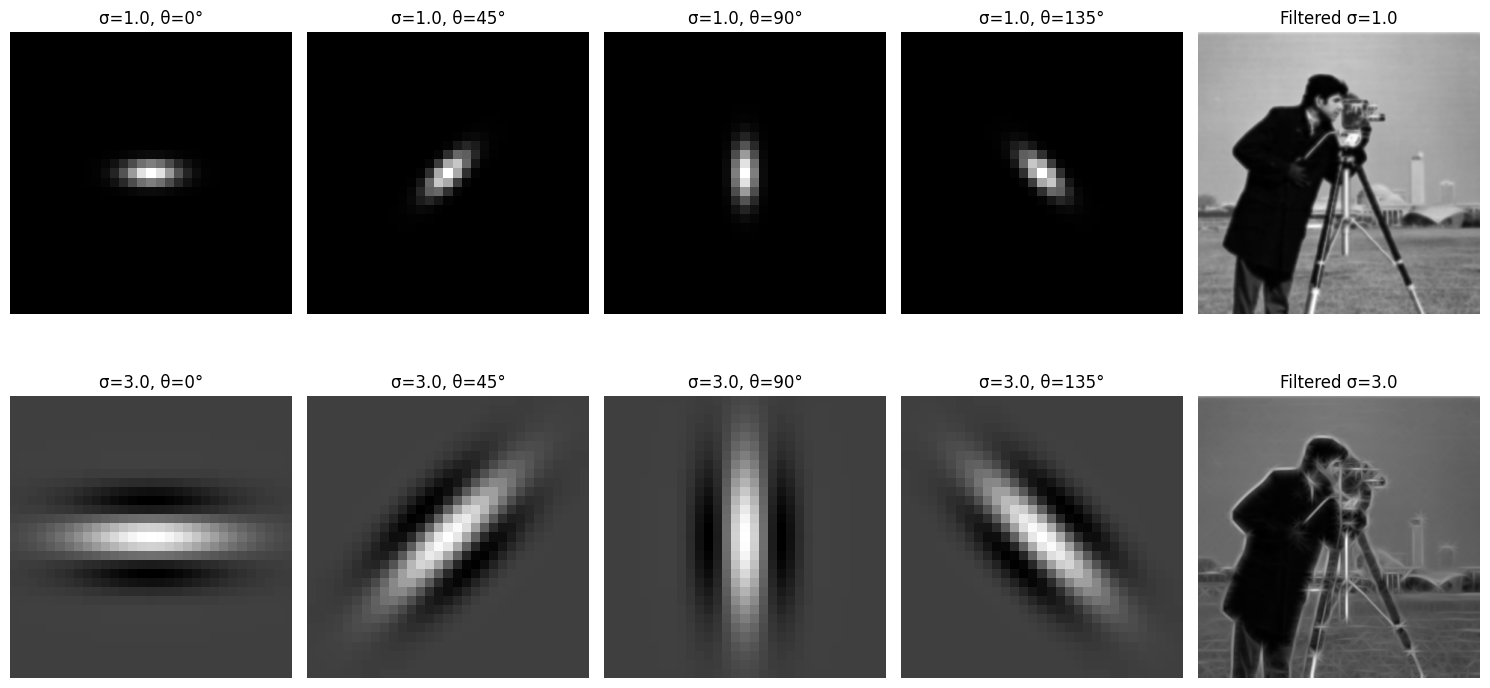

In [14]:
import cv2

def apply_opencv_gabor(img, sigma, theta_deg, lambd, gamma, phi, kernel_size):
    theta = np.deg2rad(theta_deg)
    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
    return cv2.filter2D(img, cv2.CV_32F, kernel)

opencv_filtered_images = {}

for sigma in sigma_values:
    print("OpenCV Sigma:",sigma)
    max_filtered_img = np.zeros_like(img_1_array, dtype=np.float32)

    for theta_deg in orientations:
        print("\tOpenCV theta:",theta_deg)
        lambd = 1 / f0
        filtered_img = apply_opencv_gabor(img_1_array, sigma, theta_deg, lambd, gamma, phi, kernel_size)
        max_filtered_img = np.maximum(max_filtered_img, filtered_img)

    opencv_filtered_images[sigma] = max_filtered_img

print("OpenCV Plots")
plot_gabor_results(opencv_filtered_images, opencv_filtered_images, sigma_values)



With opencv we are getting better results

**Comparision**:
- opencv version is better than from sctratch (asumming due to some logic error)
-  OpenCV results have slightly smoother, with more gradual transitions in the patterns compared to the scratch-generated results for sigma = 1.0 and 3.0 both
- The filtered image in the OpenCV result appears more refined, with better edge definition and smoother gradients, particularly noticeable in the
𝜎 = 3.0
- Both methods produce visually consistent results regarding the structure and orientation of the Gabor filters, except the actual image

Thank You